In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df = df.set_index('PassengerId')

In [11]:
# name,cabin,ticket hold unique or too many missing values and would not impact the result hence can be dropped

In [12]:
df.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [13]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


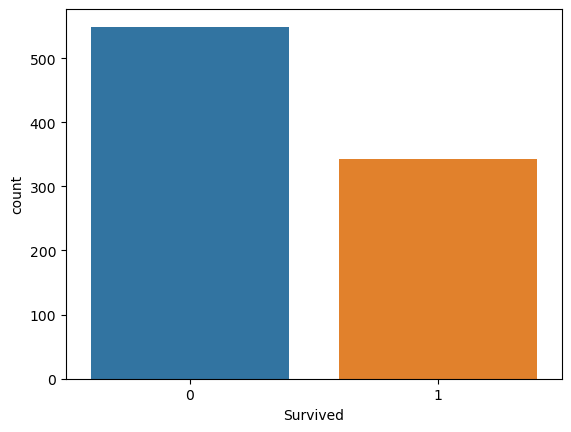

In [14]:
sns.countplot(x='Survived', data=df)
plt.show()

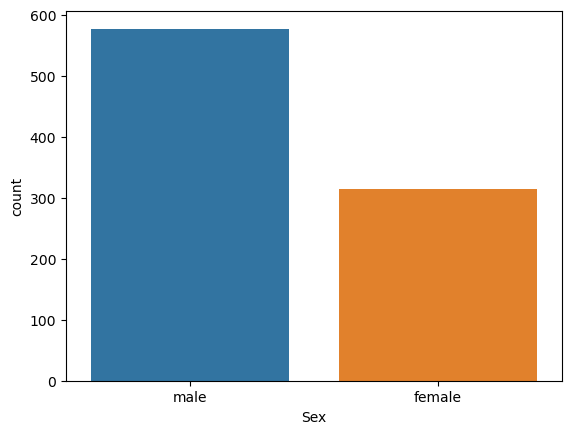

In [15]:
sns.countplot(x='Sex', data=df)
plt.show()

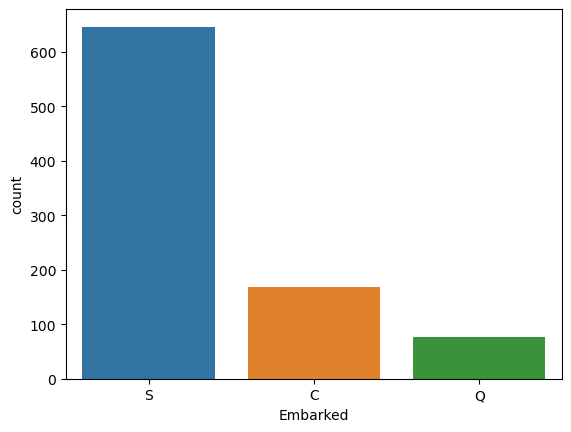

In [16]:
sns.countplot(x='Embarked', data=df)
plt.show()

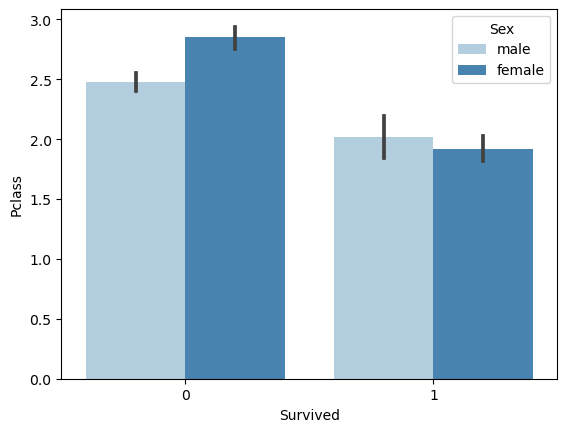

In [17]:
sns.barplot(x='Survived',y='Pclass',data=df,palette='Blues',hue='Sex')
plt.show()

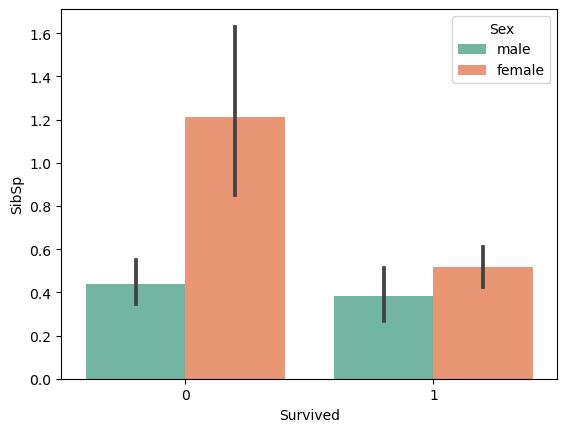

In [18]:
sns.barplot(x='Survived',y='SibSp',data=df,palette='Set2',hue='Sex')
plt.show()

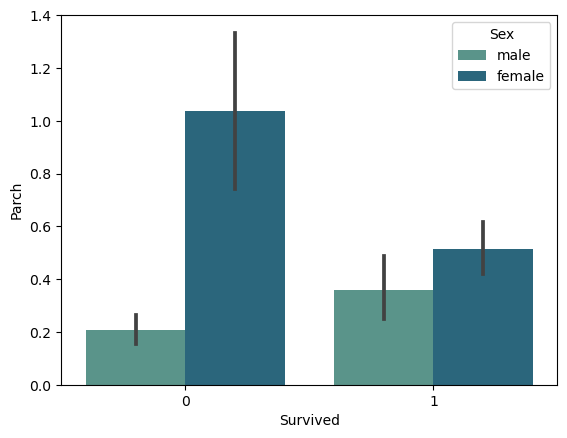

In [19]:
sns.barplot(x='Survived',y='Parch',data=df,palette='crest',hue='Sex')
plt.show()

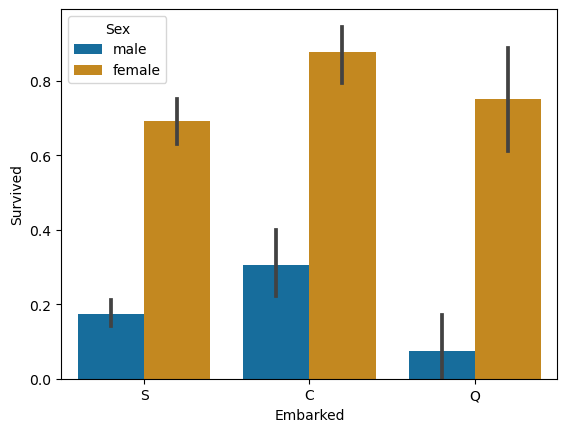

In [20]:
sns.barplot(x='Embarked',y='Survived',data=df,palette='colorblind',hue='Sex')
plt.show()

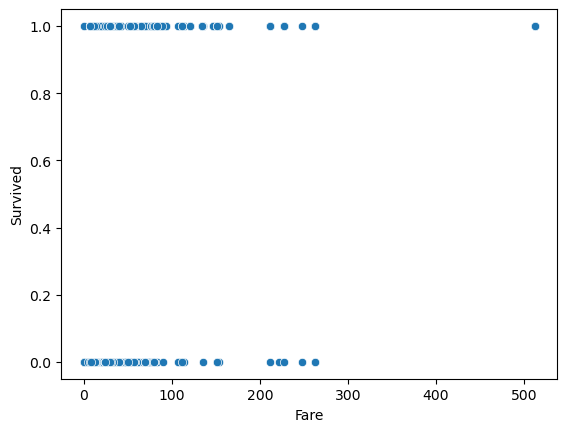

In [21]:
sns.scatterplot(x='Fare', y='Survived', data=df)
plt.show()

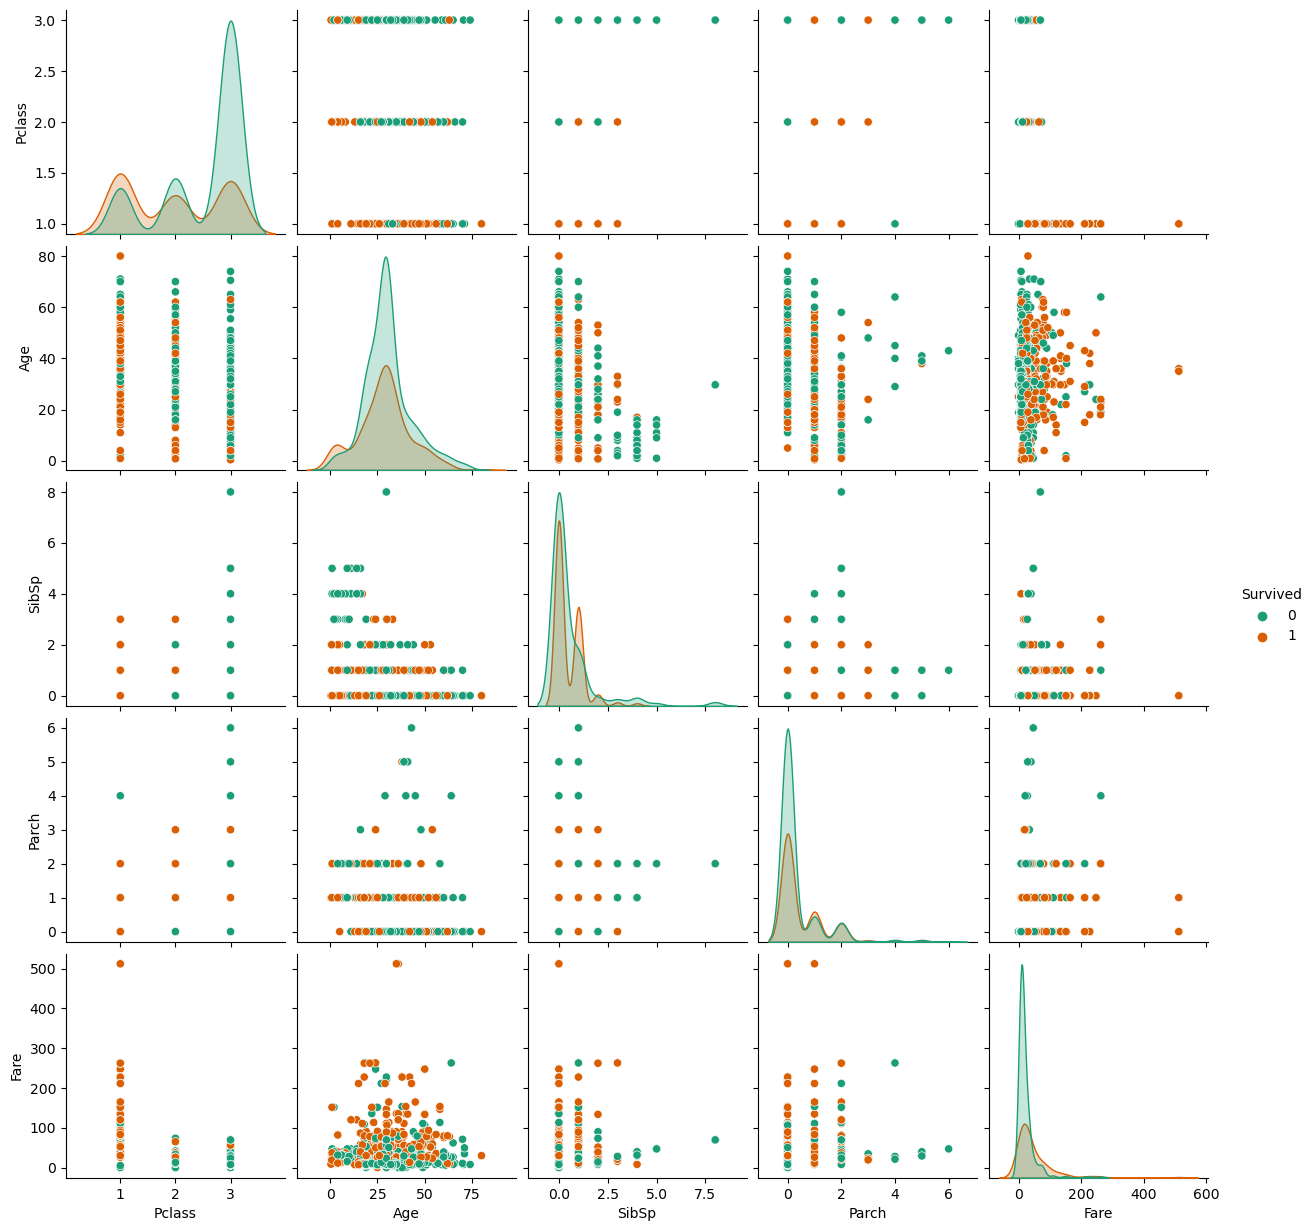

In [22]:
sns.pairplot(df, hue='Survived', palette="Dark2")
plt.show()

In [23]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,47.0,2.0
2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,47.0,2.0
4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,47.0,2.0
888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,30.0,2.0
889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,47.0,2.0


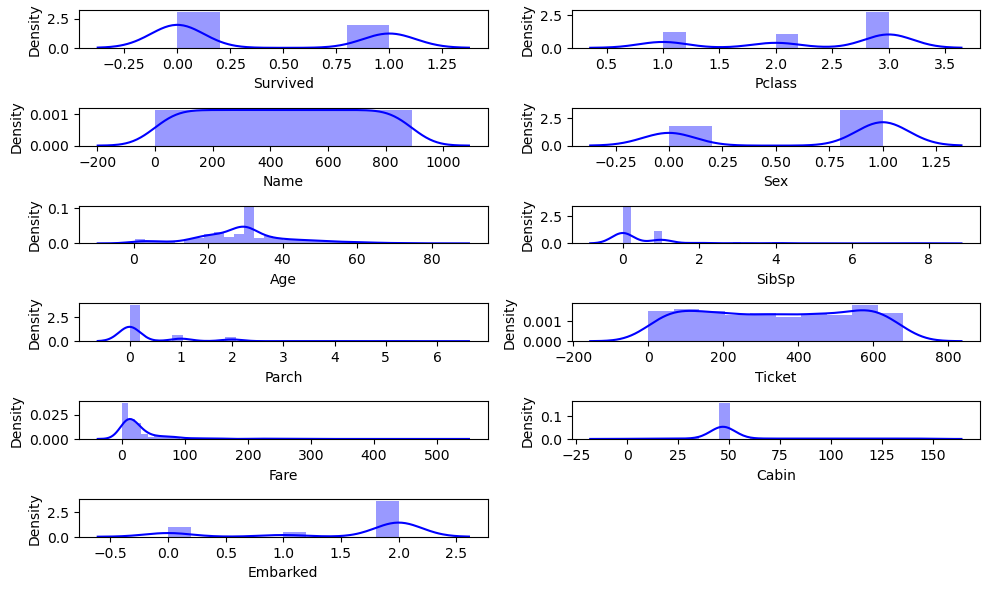

In [24]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 11:
        x=plt.subplot(6,2,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [25]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

In [38]:
df = df.drop('Cabin', axis = 1)
df = df.drop('Name', axis = 1)

In [39]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       0.789606
Parch       1.228542
Ticket      0.000246
Fare       -5.849721
Embarked   -1.264823
dtype: float64

In [30]:
df['SibSp']=np.cbrt(df['SibSp'])
df['Parch']=np.cbrt(df['Parch'])
df['Fare']=np.cbrt(df['Fare'])

In [40]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       0.789606
Parch       1.228542
Ticket      0.000246
Fare       -5.849721
Embarked   -1.264823
dtype: float64

In [32]:
df['SibSp']=np.sqrt(df['SibSp'])
df['Parch']=np.sqrt(df['Parch'])
df['Fare']=np.sqrt(df['Fare'])

In [41]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       0.789606
Parch       1.228542
Ticket      0.000246
Fare       -5.849721
Embarked   -1.264823
dtype: float64

In [34]:
df['SibSp']=np.cbrt(df['SibSp'])
df['Parch']=np.cbrt(df['Parch'])
df['Fare']=np.cbrt(df['Fare'])

In [35]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       0.789606
Parch       1.228542
Ticket      0.000246
Fare       -5.849721
Embarked   -1.264823
dtype: float64

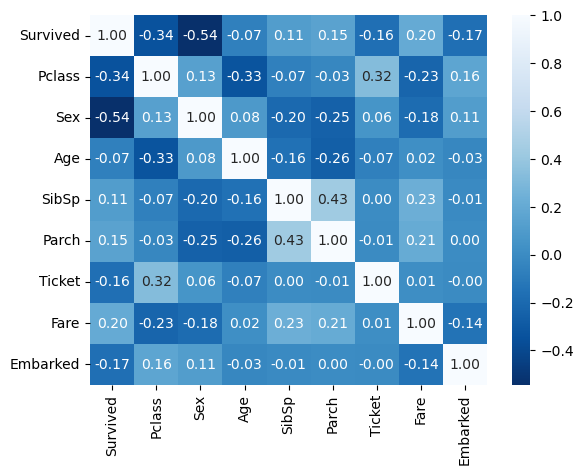

In [42]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Blues_r')
plt.show()

In [43]:
corr['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.201342
Parch       0.145375
SibSp       0.109599
Age        -0.069809
Ticket     -0.164549
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [47]:
x = df.drop('Survived', axis =1)
y = df['Survived']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.827377,0.737695,-0.592481,1.428367,-0.560276,0.918966,-0.262673,0.585954
1,-1.566107,-1.355574,0.638789,1.428367,-0.560276,1.282625,0.659004,-1.942303
2,0.827377,-1.355574,-0.284663,-0.681758,-0.560276,1.646283,-0.228924,0.585954
3,-1.566107,-1.355574,0.407926,1.428367,-0.560276,-1.442322,0.533585,0.585954
4,0.827377,0.737695,0.407926,-0.681758,-0.560276,0.664904,-0.222973,0.585954
...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.681758,-0.560276,-1.183277,-0.038213,0.585954
887,-1.566107,-1.355574,-0.823344,-0.681758,-0.560276,-1.616678,0.296177,0.585954
888,0.827377,-1.355574,0.000000,1.428367,1.826699,1.676173,0.196060,0.585954
889,-1.566107,0.737695,-0.284663,-0.681758,-0.560276,-1.646568,0.296177,-1.942303


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.382956,Pclass
1,1.119936,Sex
2,1.239520,Age
3,1.276236,SibSp
4,1.349881,Parch
5,1.130912,Ticket
6,1.161663,Fare
7,1.051817,Embarked


In [50]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [52]:
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.8909090909090909  at  64


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRS)

In [57]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [58]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
prfc = RFC.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.8757575757575757
[[149  17]
 [ 24 140]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       166
           1       0.89      0.85      0.87       164

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



In [59]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
plr = LR.predict(x_test)
print(accuracy_score(y_test,plr))
print(confusion_matrix(y_test,plr))
print(classification_report(y_test,plr))

0.8242424242424242
[[136  30]
 [ 28 136]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       166
           1       0.82      0.83      0.82       164

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



In [60]:
svc = SVC()
svc.fit(x_train,y_train)
psvc = svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.8151515151515152
[[143  23]
 [ 38 126]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       166
           1       0.85      0.77      0.81       164

    accuracy                           0.82       330
   macro avg       0.82      0.81      0.81       330
weighted avg       0.82      0.82      0.81       330



In [61]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pgb = GB.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.8848484848484849
[[151  15]
 [ 23 141]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       166
           1       0.90      0.86      0.88       164

    accuracy                           0.88       330
   macro avg       0.89      0.88      0.88       330
weighted avg       0.89      0.88      0.88       330



In [62]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pab = AB.predict(x_test)
print(accuracy_score(y_test,pab))
print(confusion_matrix(y_test,pab))
print(classification_report(y_test,pab))

0.8545454545454545
[[145  21]
 [ 27 137]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       166
           1       0.87      0.84      0.85       164

    accuracy                           0.85       330
   macro avg       0.86      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



In [63]:
B = BaggingClassifier()
B.fit(x_train,y_train)
pb = B.predict(x_test)
print(accuracy_score(y_test,pb))
print(confusion_matrix(y_test,pb))
print(classification_report(y_test,pb))

0.8545454545454545
[[149  17]
 [ 31 133]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       166
           1       0.89      0.81      0.85       164

    accuracy                           0.85       330
   macro avg       0.86      0.85      0.85       330
weighted avg       0.86      0.85      0.85       330



In [64]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pet = ET.predict(x_test)
print(accuracy_score(y_test,pet))
print(confusion_matrix(y_test,pet))
print(classification_report(y_test,pet))

0.8696969696969697
[[149  17]
 [ 26 138]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       166
           1       0.89      0.84      0.87       164

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



In [65]:
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,prfc) - score.mean())

[0.81363636 0.82727273 0.83181818 0.89497717 0.89041096]
0.8516230801162308
Diff b/w Acc score and cross val score : 0.024134495641344955


In [66]:
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,plr) - score.mean())

[0.78636364 0.78636364 0.75       0.80365297 0.81278539]
0.7878331257783312
Diff b/w Acc score and cross val score : 0.03640929846409302


In [67]:
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,psvc) - score.mean())

[0.77727273 0.80454545 0.77272727 0.83105023 0.82191781]
0.801502698215027
Diff b/w Acc score and cross val score : 0.013648816936488228


In [68]:
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pgb) - score.mean())

[0.80454545 0.82272727 0.81818182 0.87671233 0.8630137 ]
0.8370361145703612
Diff b/w Acc score and cross val score : 0.047812370278123684


In [69]:
score = cross_val_score(AB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pab) - score.mean())

[0.76363636 0.82272727 0.80909091 0.86757991 0.82191781]
0.8169904524699045
Diff b/w Acc score and cross val score : 0.03755500207554996


In [70]:
score = cross_val_score(B,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pb) - score.mean())

[0.78636364 0.81363636 0.85909091 0.87214612 0.87214612]
0.8406766293067662
Diff b/w Acc score and cross val score : 0.013868825238688265


In [71]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pet) - score.mean())

[0.78181818 0.79090909 0.8        0.87671233 0.88127854]
0.8261436280614364
Diff b/w Acc score and cross val score : 0.04355334163553337


In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [25, 50, 100, 150], 
              'max_features': ['sqrt', 'log2', None], 
              'max_depth': [3, 6, 9], 
              'max_leaf_nodes': [3, 6, 9], }

In [73]:
GVC = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [74]:
GVC.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [76]:
Final_model = RandomForestClassifier(max_depth = 9, max_features = None, max_leaf_nodes = 9, n_estimators = 100)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

83.93939393939394


In [77]:
import joblib
joblib.dump(Final_model,"Titanic.pkl")

['Titanic.pkl']

In [78]:
model = joblib.load("Titanic.pkl")

prediction = model.predict(x_test)
prediction

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,

In [79]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = prediction
df['Original'] = a
df

,predicted,Original
0,1,1
1,1,1
2,0,1
3,1,1
4,0,0
...,...,...
325,0,0
326,1,1
327,1,1
328,0,1
